$\newcommand{\C}{\mathbb{C}}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\length}[1]{\left| #1 \right|}$

In [2]:
using PyPlot

INFO: Loading help data...


### Exercise 1

An affine mapping $A: \C \to \C$ is a mapping given by
    $A(z) = a z + b$, for $a, b \in \C$ and $a \neq 0$.
Characterize the behavior of the iterates as $n \to \infty$.

$z_0 = z_0$

$z_1 = a z_0 + b$

$z_2 = a^2 z_0 + a b + b$.

I'm guessing that $z_n = a^n z_0 + \left( \sum_{i=0}^{n-1} a^i \right) b$.
Let's see if we can go about proving this by iterating the map.

$\begin{align*}
a (z_n ) + b & = a \left( a^n z_0 + \left( \sum_{i=0}^{n-1} a^i \right) b \right) + b\\
& = a^{n+1} z_0 + b \sum_{i=0}^{(n+1)-1} a^i\\
a (z_n) + b & = z_{n+1}
\end{align*}$

Since the base case of the formula is accurate, we have inductively shown that there is a formula for $z_n$.

Suppose $a = 1$.  Then $z_n = z_0 + n b$.  This is unstable as $n \to \infty$.

Now, suppose $a \neq 1$. If we note that $\sum_{i=0}^{n-1} a^i = \frac{1 - a^n}{1 - a}$, we obtain the formula:

$z_n = a^n z_0 + \left( \frac{1 - a^n}{1 - a} \right) b$

Note that this can be refactored to obtain the equivalent formula:

$z_n = a^n \left( z_0 - \frac{b}{1-a} \right) + \frac{b}{1-a}$

We conclude that $\frac{b}{1-a}$ is a fixed point for all values of $a$.
If $\length{a} < 1$, then the fixed point will be stable as $n \to \infty$,
while if $\length{a} > 1$ then the fixed point will be unstable as $n \to \infty$.  If $\length{a} = 1$, the iterates will circle the fixed point forever.

### Exercise 2

Consider the map $z \to z^2 + c$ for $c \in \C$.  
Find the fixed points of this map.

If $z_f$ is a fixed point of the map, then $z_f = z_f^2 + c$.
Therefore, by the quadratic formula, if $z_f$ is a fixed point
then $z_f = \frac{1}{2} \pm \sqrt{ \frac{1}{4} - c }$.

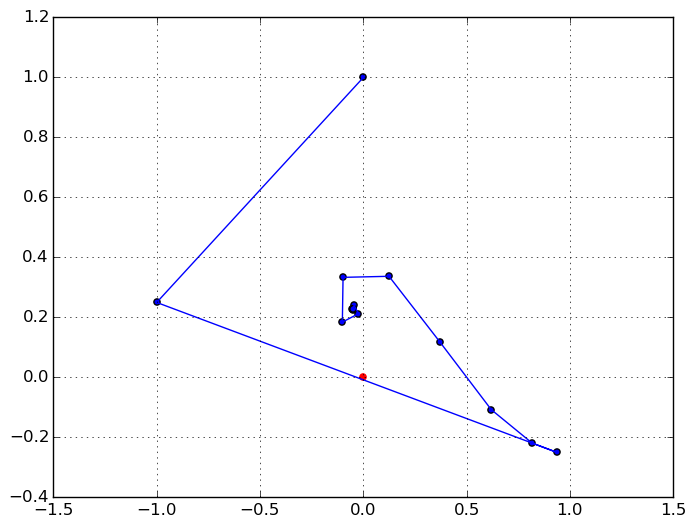

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0xa5f2274c>

In [38]:
c = 0.25im
zf = 0.5 - sqrt(0.25 - c)

function iteration( z )
    return z.^2 + c
end

function iterate2( z0::Complex{Float64}, n::Int)
    z = zeros(Complex{Float64},n+1)
    z[1] = z0
    for i = 2:(n+1)
        z[i] = iteration(z[i-1])
    end
    return z
end

z0 = 1.0im

scatter([0, real(zf)],[0, imag(zf)], color="red"); 
grid(true);
scatter(real(iterate2(z0,20)), imag(iterate2(z0,20)))
plot(real(iterate2(z0,20)), imag(iterate2(z0,20)))

### Exercise 3

Suppose $z_f$ is a fixed point of $z \to z^2 + c$ for some $c \in \C$.
In [Exercise 2](http://localhost:8888/notebooks/Exercises.ipynb#Exercise-2),
we showed that there are two fixed points of this mapping.
Determine their stability.

Suppose $z_f$ is a fixed point of $z \to z^2 + c$, i.e., $z_f = z_f^2 + c$.
Consider $z_f + \epsilon$.
Its iterate is $(z_f + \epsilon)^2 + c$ = $z_f^2 + 2 z_f \epsilon + \epsilon^2 + c$.
Taking this to the first order in $\epsilon$, and substituting $z_f$ for $z_f^2 + c$, the iterate becomes $z_f + 2 z_f \epsilon$.

This suggests that near $z_f$, the iteration behaves like a map
$\epsilon \to 2 z_f \epsilon$.
Therefore, the iteration is stable near $z_f$ if $\length{2 z_f} < 1$.

In [Exercise 2](http://localhost:8888/notebooks/Exercises.ipynb#Exercise-2) we determined that the two fixed points
of the iteration $z \to z^2 + c$ are $z_\pm = \frac{1}{2} \pm \sqrt{ \frac{1}{4} - c }$.
Let's see if $\length{2 z_\pm} < 1$.

$2 z_\pm = 1 \pm \sqrt{1 - 4 c}$.

Let $a = 1 - 4 c$, and define $r > 0$ and $\theta \in (-\pi, \pi]$
such that $a = r e^{i \theta}$.

Therefore $2 z_\pm = 1 \pm \sqrt{r}  e^{i \theta / 2 }$,
and thus:

$
\begin{align*}
\length{ 2 z_\pm} & = (1 \pm \sqrt{r} \cos{ \frac{\theta}{2} })^2 + \sin^2{\frac{\theta}{2}}\\
& = 1 \pm 2 \sqrt{r} \cos{ \theta / 2 } + r 
\end{align*}$

So, $\length{2 z_\pm} < 1$ if $ \pm 2 \sqrt{r} \cos{\theta / 2} + r < 0$.
Since $r \geq 0$, we know that the root $z_+$ is unstable for all choices of parameters.

We proceed to determine under what circumstances $z_-$ is stable.
For the inequality to hold, we require:

$ \sqrt{r} < 2 \cos{ \theta / 2 } $

or

$ r < 4 \cos^2 \left( \frac{\theta}{2} \right) $


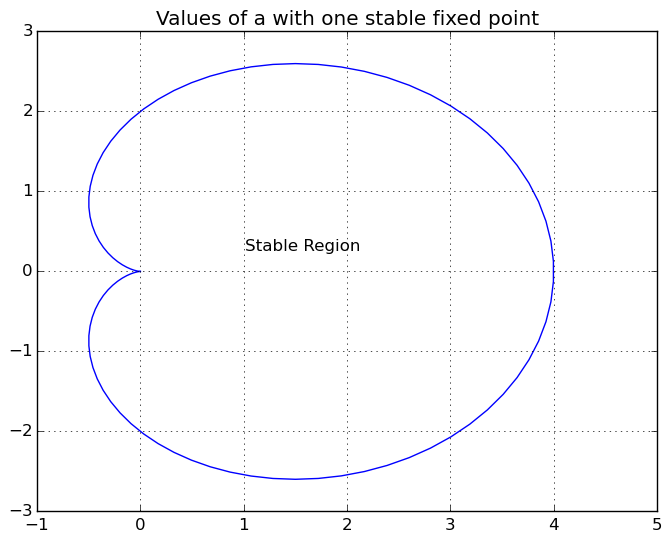

PyObject <matplotlib.text.Annotation object at 0xaa283b2c>

In [3]:
θ = linspace(-π,π)
title("Values of a with one stable fixed point")
axis([-1.0, 5.0, -3.0, 3.0]); grid(true)
plot(4*cos(θ/2.0).^2.*cos(θ),4*cos(θ/2.0).^2.*sin(θ))
annotate("Stable Region", (1.0 + rand(),rand()))

Since $a = 1 - 4 c$, $c = \frac{1 - a}{4}$.  
We can now plot the values of $c$ for which there is a stable fixed point.

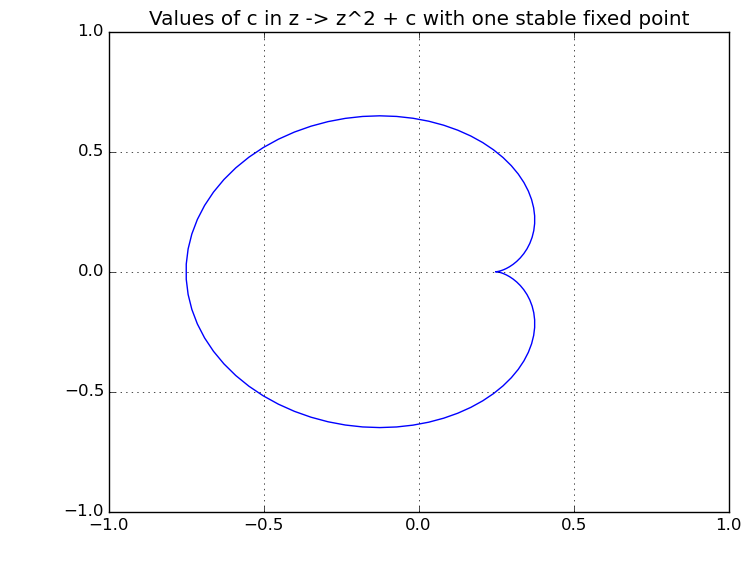

In [4]:
θ = linspace(-π,π)
title("Values of c in z -> z^2 + c with one stable fixed point")
axis([-1.0, 1.0, -1.0, 1.0]); grid(true)
plot(0.25 - cos(θ/2.0).^2.*cos(θ),cos(θ/2.0).^2.*sin(θ))
annotate("Stable Region", (1.0 + rand(),rand()))
savefig("One Stable Fixed Point")

In [39]:
function radius_of_convergence( c )
    1.0 - abs(1.0 - sqrt(1.0 - 4.0 * c))
end

radius_of_convergence (generic function with 1 method)

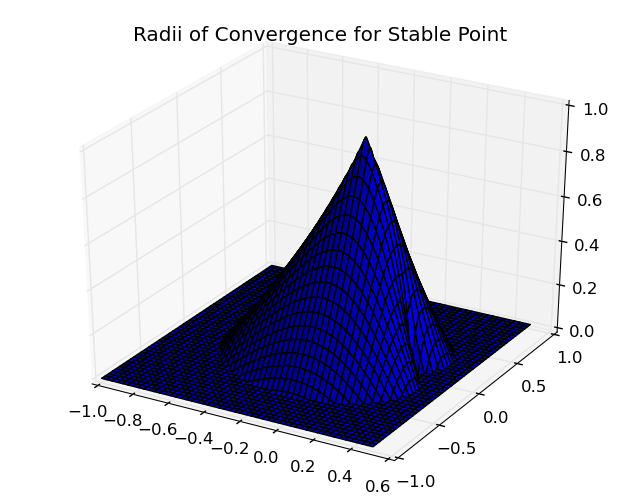

In [62]:
n = 500
Z = linspace(-1.0, 0.5, n) * ones(n)' + 1.0im*ones(n) * linspace(-1.0,1.0,n)'
Naked_Radii = radius_of_convergence(Z)
radii = convert(Array{Float64,2},reshape([ (r > 0 ? r : 0) for r in Naked_Radii ],(n,n)))
plot_surface( real(Z), imag(Z), radii); title("Radii of Convergence for Stable Point")
savefig("Convergence Radii Plot")

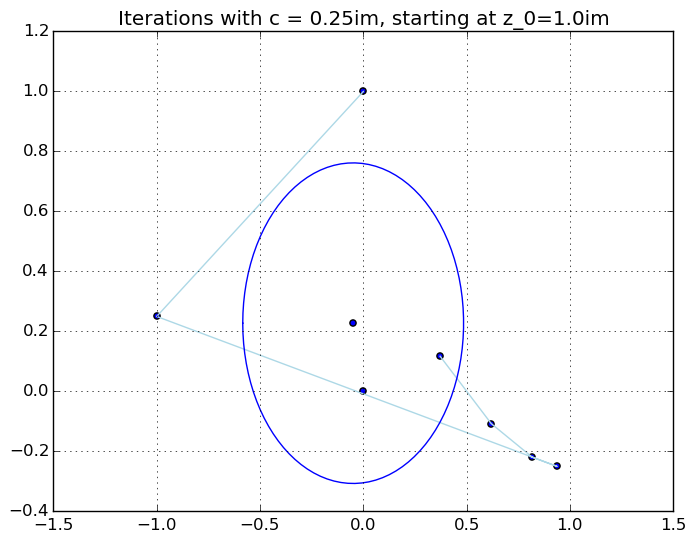

In [63]:
c = 0.25im
z_f = 0.5 * ( 1.0 - sqrt( 1.0 - 4.0 * c))

z_0 = 1.0im
scatter(real(iterate2(z_0,5)),imag(iterate2(z_0,5)))
plot(real(iterate2(z_0,5)),imag(iterate2(z_0,5)),color="lightblue")

r = radius_of_convergence(c)
θ = linspace(-π,π,100)
scatter([0,real(z_f)],[0,imag(z_f)])
plot(real(z_f) + r*cos(θ), imag(z_f) + r*sin(θ)); grid(true);
title("Iterations with c = 0.25im, starting at z_0=1.0im")
savefig("Convergence")

In [64]:
function back_iterate_plus( z )
    return sqrt(z - c)
end

function back_iterate_minus(z)
    return -sqrt(z-c)
end

back_iterate_minus (generic function with 1 method)

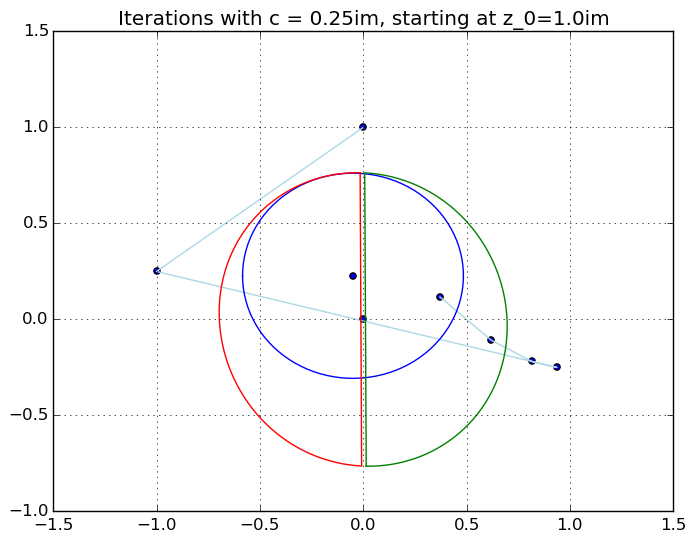

PyObject <matplotlib.text.Text object at 0xa1b0884c>

In [70]:
c = 0.25im
z_f = 0.5 * ( 1.0 - sqrt( 1.0 - 4.0 * c))


z_0 = 1.0im
scatter(real(iterate2(z_0,5)),imag(iterate2(z_0,5)))
plot(real(iterate2(z_0,5)),imag(iterate2(z_0,5)),color="lightblue")

r = radius_of_convergence(c)
θ = linspace(-π,π,100)
scatter([0,real(z_f)],[0,imag(z_f)])
circle = z_f + r *exp(1.0im * θ)
plot(real(circle),imag(circle)); grid(true);
plot(real(back_iterate_plus(circle)),imag(back_iterate_plus(circle)))
plot(real(back_iterate_minus(circle)),imag(back_iterate_minus(circle)))
title("Iterations with c = 0.25im, starting at z_0=1.0im")

### Exercise 5

Make precise the statement of convergence to a periodic orbit.

Suppose $f(z)$ is a function $\C \to \C$.
Then, $f(f(z))$ is that function applied to itself twice.
If there is a two-periodic orbit of $f$, then the fixed points
of $f(f(z))$ will contain both points in that orbit.

The orbit will be considered stable if $\length{(f(f(z))'} < 1$,
because if $f(f(z_0)) = z_0$, and $f$ is analytic, then near $z$ we see
$f(f(z_0 + \epsilon)) = z_0 + (f(f(z))'(z_0) \epsilon$.
Note that $(f(f(z)))' = f'(f(z)) f'(z)$, which will be the same at any points on a two-cycle.

For example, consider $f_c(z) = z^2 - c$.
The self-composition is $z^4 + 2 c z^2 + c(c+1)$.
Since we know that fixed points of $f_c$ are fixed points of $f_c \circ f_c$, we can divide that polynomial by $z^2 - z + c$.

$\frac{z^4 + 2 c z^2 + c(c+1)}{z^2 - z + c} = z^2 + z + (c+1)$

Therefore, the two two-cycle endpoints are $z_{(2)} = - \frac{1}{2} \pm i \sqrt{\frac{3}{4} + c}$.

$f_c'(z) = 2 z$, and therefore:

$\begin{align*}
f_c'(f_c(z_{(2)})) f_c'( z_{(2)}) & = \left( 2 \left( - \frac{1}{2} - i \sqrt{\frac{3}{4} + c} \right) \right)
\left( 2 \left( - \frac{1}{2} + i \sqrt{\frac{3}{4} + c} \right) \right)\\
& = 4 \left( \frac{1}{4} + \left( \frac{3}{4} + c \right) \right)\\
& = 4(1 + c)
\end{align*}$


Therefore, the two-cycle is stable when $\length{4(1+c)} < 1$.
We can thus plot the region on $\C$ where two-cycles are stable.

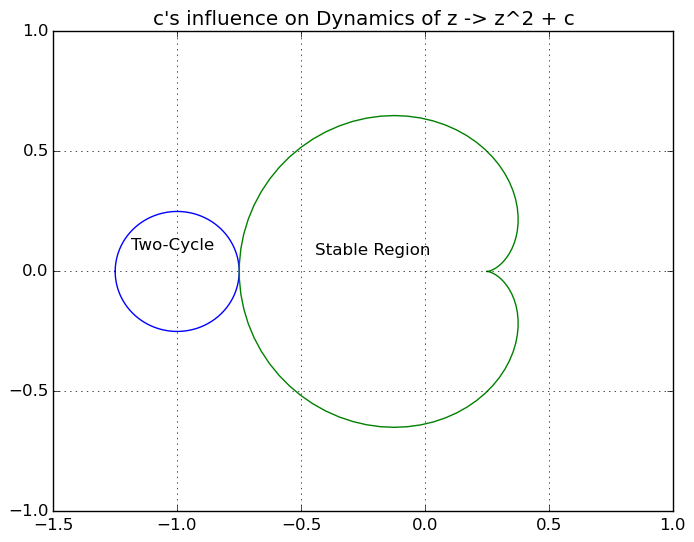

PyObject <matplotlib.text.Text object at 0xaa2a198c>

In [5]:
θ = linspace(-π,π)
axis([-1.5, 1.0, -1.0, 1.0]); grid(true)
plot(cos(θ)/4.0 - 1, sin(θ)/4.0)
plot(0.25 - cos(θ/2.0).^2.*cos(θ),cos(θ/2.0).^2.*sin(θ))
annotate("Stable Region", (-0.5 + 0.4*rand(),0.2*rand()));
annotate("Two-Cycle", (-1.2 + 0.2*rand(), 0.2*rand()))
title("c's influence on Dynamics of z -> z^2 + c")

Where does this look familiar...oh.

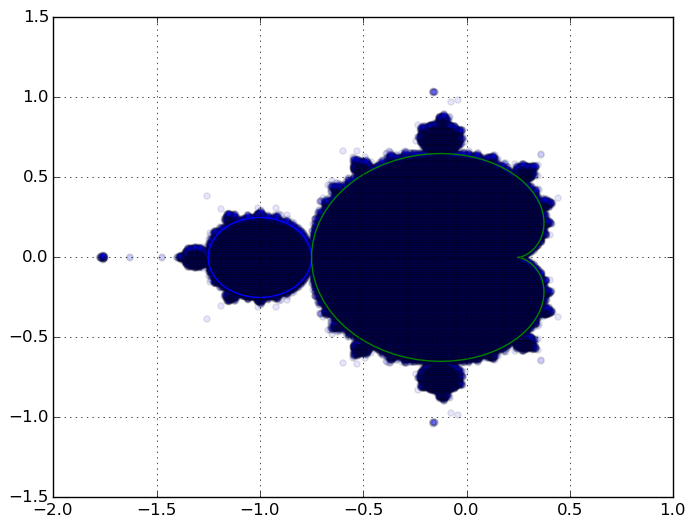

In [11]:
θ = linspace(-π,π)
n = 1000
Z = linspace(-2.0, 2.0,n)*ones(n)' + 1.0im*ones(n)*linspace(-2.0, 2.0, n)'
ZC = Z
for i = 1:100
    ZC = ZC.^2 + Z
end
M = Z[(abs(ZC) .< 5.0)]
scatter(real(M), imag(M), alpha=0.1)
plot(cos(θ)/4.0 - 1, sin(θ)/4.0)
plot(0.25 - cos(θ/2.0).^2.*cos(θ),cos(θ/2.0).^2.*sin(θ))
grid(true)
savefig("Periodic Orbits and Mandelbrodt Set")

Just for fun, a better picture of the mandelbrot set:

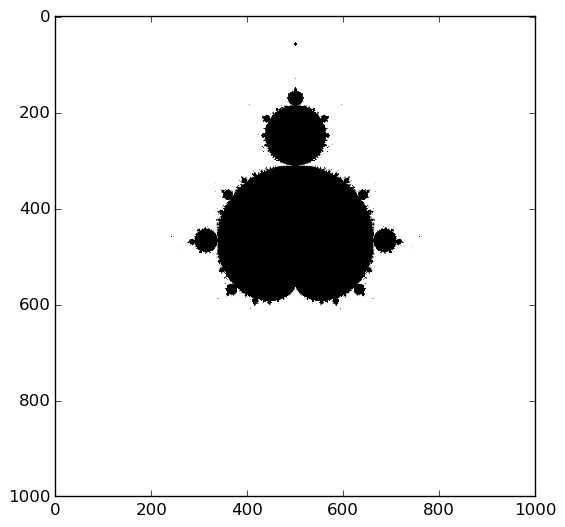

PyObject <matplotlib.image.AxesImage object at 0xa9a06aac>

In [7]:
imshow((abs(ZC) .< 5.0), cmap="Greys")

### Exercise 6

Consider the map $p_{-1}$, or $z \to z^2 - 1$.
We want to find a point $z_0$ such that there are nearby points
which settle down to a fixed point, _and_ nearby points which excape to infinity.

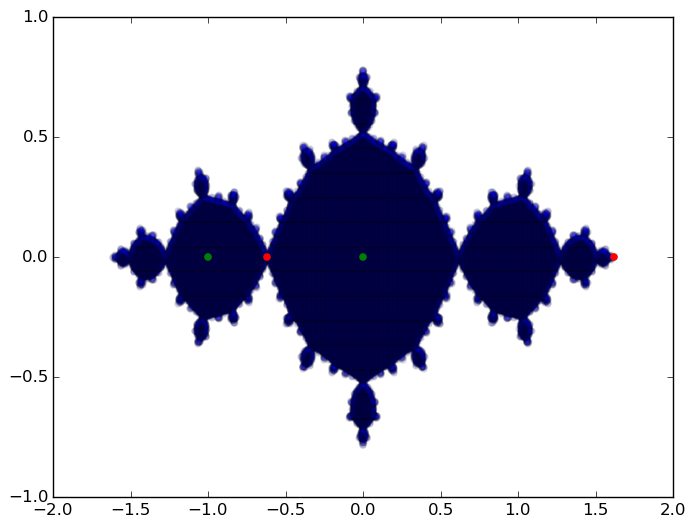

PyObject <matplotlib.collections.PathCollection object at 0xaa117a0c>

In [8]:
n = 1000
c = -1.0
Z = linspace(-2.0, 2.0,n)*ones(n)' + 1.0im*ones(n)*linspace(-2.0, 2.0, n)'
ZC = Z
for i = 1:100
    ZC = ZC.^2 + c
end
M = Z[(abs(ZC) .< 5.0)]
scatter(real(M), imag(M), alpha=0.1)
fixed_points = [ 0.5 + sqrt(0.25 - c + 0.0im), 0.5 - sqrt(0.25 - c + 0.0im)]
two_cycles = [ -0.5 + sqrt(-0.75 - c + 0.0im), -0.5 - sqrt(-0.75 - c + 0.0im)]
scatter(real(fixed_points), imag(fixed_points), color="red")
scatter(real(two_cycles), imag(two_cycles), color="green")

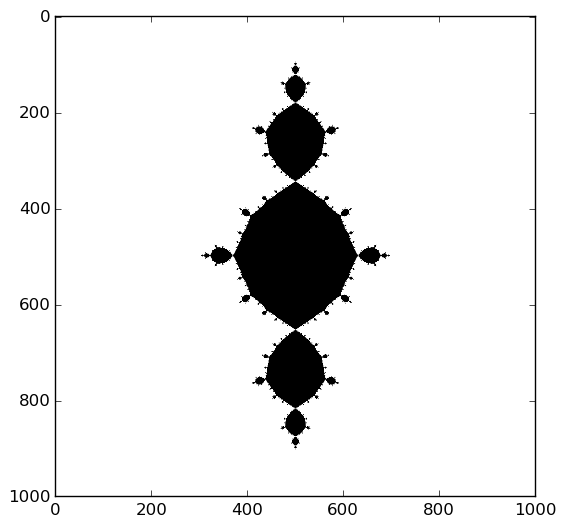

PyObject <matplotlib.image.AxesImage object at 0xa9ef666c>

In [9]:
imshow((abs(ZC) .< 5.0),cmap="Greys")

Working in $\R$ as a subset of $\C$, we consider $z \to z^2 - 1$.
The colored region in the above image is the set of points which have
not escaped to infinity after 100 iterations.

Note that if $z \in \R$, $z^2 - 1 \in \R$.
On the graph below, we see that if any point is between the two intersections, it will go to the fixed point, while if any point is to
the right of the rightmost intersection it escapes to infinity.

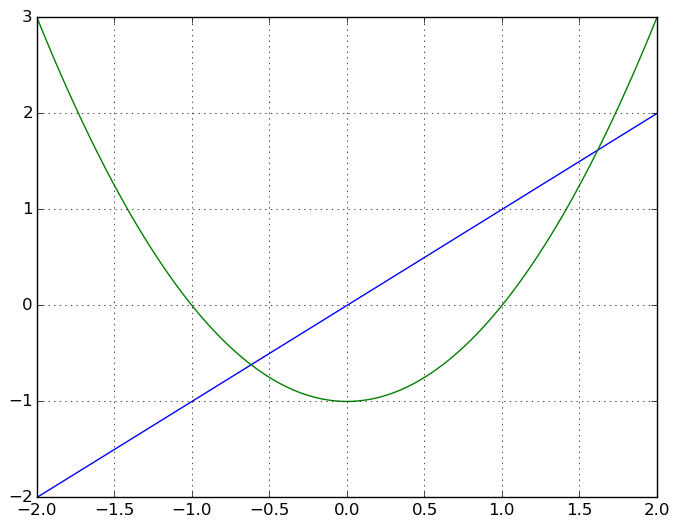

In [10]:
x = linspace(-2,2); grid(true)
plot(x,x); plot(x, x.^2 - 1);

### Exercise 10

Show that for any $c$ there is a radius $R(c)$ such that for any initial condition $z_0$ with $z_0 > R(c)$ the orbit $\{z_n\}$ excapes to $\infty$.

Recall that $\length{z}^2 - \length{c} \leq \length{z^2 - c}$.

Suppose for some $\epsilon \in \R_+$, $\length{z} > \frac{1}{2} \left( 1 + \sqrt{1 + 4 \length{c} } \right) + \epsilon$.

Then:

$\begin{align*}
\length{z}^2 & > \frac{1}{4} \left( 1 + 2 \sqrt{1 + 4 \length{c} } + 1 + 4 \length{c} \right) + \epsilon  \left( 1 + \sqrt{1 + 4 \length{c} } \right) + \epsilon^2 \\
\length{z}^2 - \length{c} & > \length{z} + \epsilon  \left( 1 + \sqrt{1 + 4 \length{c} } \right) + \epsilon^2\\
\length{z^2 + c} & > \length{z} + \epsilon  \left( 1 + \sqrt{1 + 4 \length{c} } \right) + \epsilon^2\\
\length{z^2 + c} - \length{z} & > \epsilon  \left( 1 + \sqrt{1 + 4 \length{c} } \right) + \epsilon^2\\
\end{align*}$

We conclude that the if $\length{z} > \frac{1}{2} \left( 1 + \sqrt{1 + 4 \length{c} } \right) + \epsilon$, then the length of successive steps is bounded below.  Therefore, the orbit goes to $\infty$.

In [11]:
using PyPlot

INFO: Loading help data...


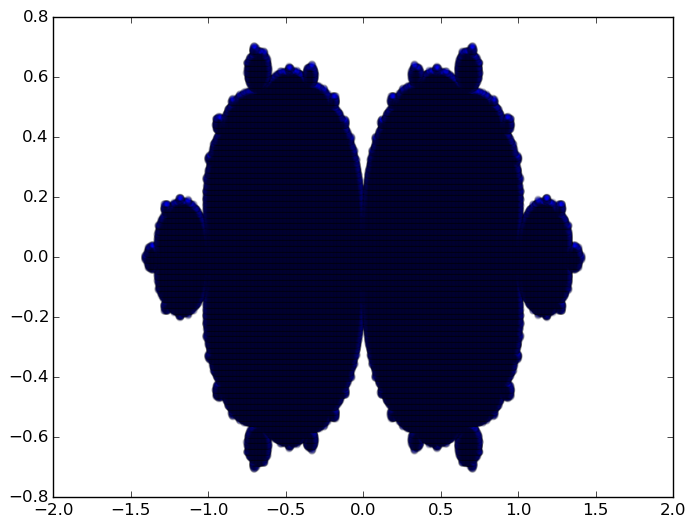

PyObject <matplotlib.collections.PathCollection object at 0xab15468c>

In [15]:
n = 1000
c = -1.0
Z = linspace(-sqrt(2.0), sqrt(2.0),n)*ones(n)' + 1.0im*ones(n)*linspace(-sqrt(2.0), sqrt(2.0), n)'
ZC = Z
for i = 1:200
    ZC = ZC - ZC.^3
end
M = Z[(abs(ZC) .< sqrt(2.0))]
scatter(real(M), imag(M), alpha=0.1)

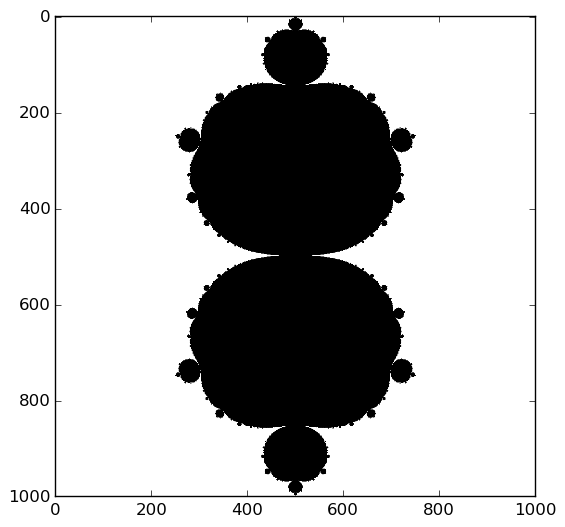

PyObject <matplotlib.image.AxesImage object at 0xab0cd0ac>

In [16]:
imshow((abs(ZC) .< sqrt(2.0)),cmap="Greys")

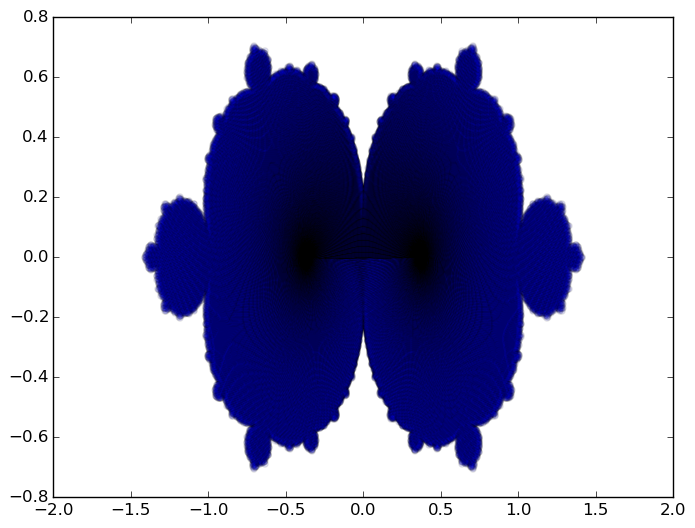

PyObject <matplotlib.collections.PathCollection object at 0xaa8d150c>

In [17]:
scatter(real(M - M.^3), imag(M - M.^3), alpha=0.1)

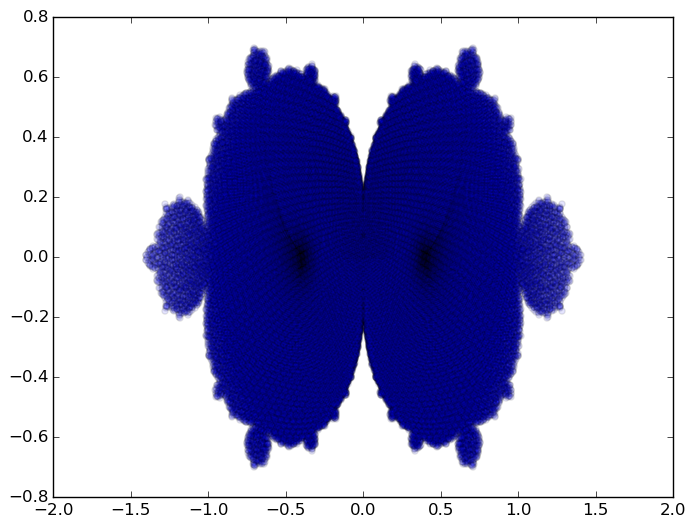

PyObject <matplotlib.collections.PathCollection object at 0xaa8b7cec>

In [18]:
M1 = M - M.^3
M2 = M1 - M1.^3
scatter(real(M2), imag(M2), alpha=0.1)

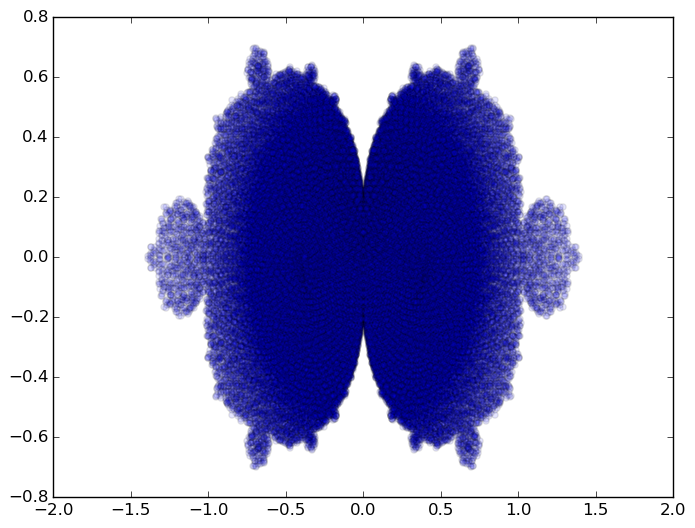

PyObject <matplotlib.collections.PathCollection object at 0xaa69490c>

In [19]:
M3 = M2 - M2 .^ 3
scatter(real(M3), imag(M3), alpha=0.1)

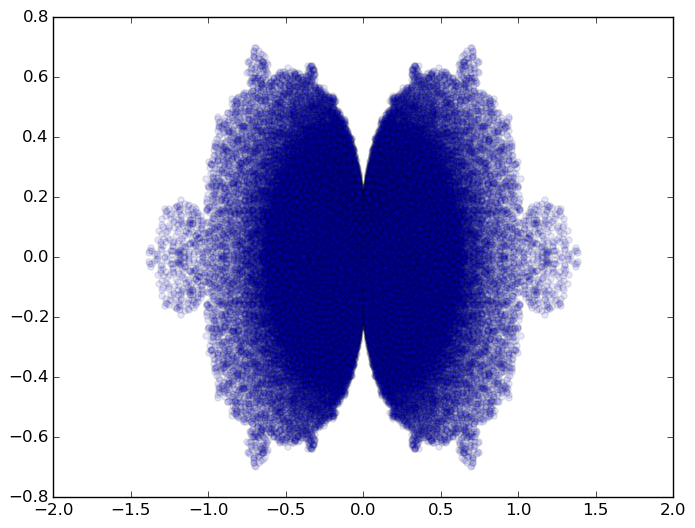

PyObject <matplotlib.collections.PathCollection object at 0xaa5fa22c>

In [20]:
M4 = M3 - M3 .^ 3
scatter(real(M4), imag(M4), alpha=0.1)